## Template - XGBoost Regression
Dataset - Kaggle Bike Sharing dataset

In [1]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option("display.max_columns", 200)

## Load Data

In [4]:
df = pd.read_csv("Datasets/bike_all.csv")

In [5]:
df.head()

,datetime,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,16,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5,0
1,2011-01-01 01:00:00,40,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,1
2,2011-01-01 02:00:00,32,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,2
3,2011-01-01 03:00:00,13,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,3
4,2011-01-01 04:00:00,1,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,4


In [6]:
df.shape

(10886, 15)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
count,10886.0,191.574132,181.144454,1.00,42.0000,145.000,284.0000,977.0000
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
year,10886.0,2011.501929,0.500019,2011.00,2011.0000,2012.000,2012.0000,2012.0000


In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [11]:
df['datetime'].describe()

C:\Users\Starl\AppData\Local\Temp/ipykernel_24508/476314687.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['datetime'].describe()


count                   10886
unique                  10886
top       2011-01-01 00:00:00
freq                        1
first     2011-01-01 00:00:00
last      2012-12-19 23:00:00
Name: datetime, dtype: object

## Data Explore

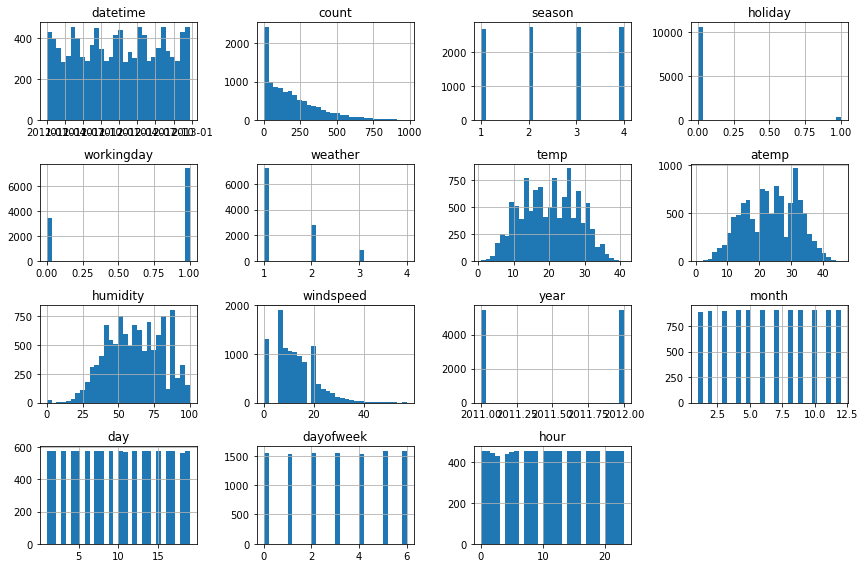

In [13]:
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

## Data Clean

In [14]:
print(df.shape)
df.drop("datetime", axis=1, inplace=True)
print(df.shape)

(10886, 15)
(10886, 14)


## Data Preprocessing & Feature Engineering

In [15]:
df['count_log1p'] = np.log1p(df['count'])

In [16]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_log1p
0,16,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5,0,2.833213
1,40,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,1,3.713572
2,32,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,2,3.496508
3,13,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,3,2.639057
4,1,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,4,0.693147


## Model Training

In [21]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop(['count', 'count_log1p'], axis=1)
y = df['count_log1p']
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=5)

In [19]:
reg = xgb.XGBRegressor(objective='reg:squarederror',
                       max_depth=10,
                       n_estimators=150)

In [20]:
reg

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=10,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [24]:
reg.fit(X_train, 
        y_train, 
        eval_set=[(X_train, y_train), (X_validation, y_validation)],
        early_stopping_rounds=10)

[0]	validation_0-rmse:3.06643	validation_1-rmse:3.03980
[1]	validation_0-rmse:2.17551	validation_1-rmse:2.15962
[2]	validation_0-rmse:1.55026	validation_1-rmse:1.54592
[3]	validation_0-rmse:1.11383	validation_1-rmse:1.12326
[4]	validation_0-rmse:0.80589	validation_1-rmse:0.82861
[5]	validation_0-rmse:0.59149	validation_1-rmse:0.63184
[6]	validation_0-rmse:0.44352	validation_1-rmse:0.50510
[7]	validation_0-rmse:0.34076	validation_1-rmse:0.42279
[8]	validation_0-rmse:0.27042	validation_1-rmse:0.37322
[9]	validation_0-rmse:0.22305	validation_1-rmse:0.34378
[10]	validation_0-rmse:0.18860	validation_1-rmse:0.32684
[11]	validation_0-rmse:0.16739	validation_1-rmse:0.31809
[12]	validation_0-rmse:0.15114	validation_1-rmse:0.31208
[13]	validation_0-rmse:0.13930	validation_1-rmse:0.30873
[14]	validation_0-rmse:0.12942	validation_1-rmse:0.30739
[15]	validation_0-rmse:0.12208	validation_1-rmse:0.30712
[16]	validation_0-rmse:0.11661	validation_1-rmse:0.30605
[17]	validation_0-rmse:0.11095	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [25]:
eval_result = reg.evals_result()

In [26]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

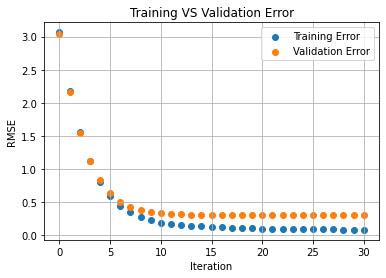

In [28]:
plt.scatter(x=training_rounds, y=eval_result['validation_0']['rmse'], label='Training Error')
plt.scatter(x=training_rounds, y=eval_result['validation_1']['rmse'], label='Validation Error')
plt.grid(True)
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title("Training VS Validation Error")
plt.legend()
plt.show()

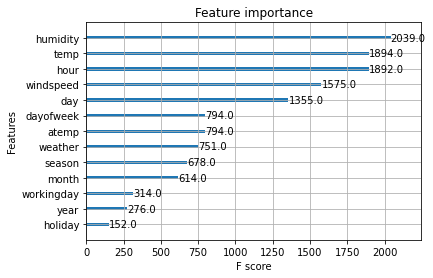

In [29]:
xgb.plot_importance(reg)
plt.show()

In [30]:
predict_count_log1p = reg.predict(X_validation)

In [44]:
actual_validation_count = np.expm1(y_validation).values

In [48]:
predict_validation_count = np.expm1(predict_count_log1p)

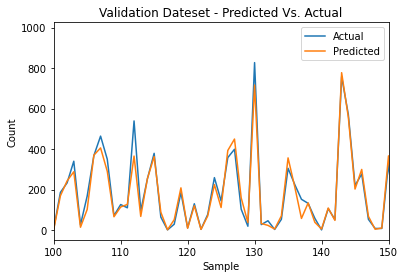

In [49]:
# Actual vs. predicted
plt.plot(actual_validation_count, label='Actual')
plt.plot(predict_validation_count, label='Predicted')
plt.xlabel("Sample")
plt.ylabel("Count")
plt.xlim([100, 150])
plt.title("Validation Dateset - Predicted Vs. Actual")
plt.legend()
plt.show()

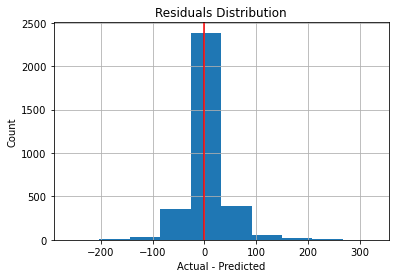

In [51]:
# Residual Distribution
residuals = actual_validation_count - predict_validation_count

plt.hist(residuals)
plt.grid(True)
plt.xlabel("Actual - Predicted")
plt.ylabel("Count")
plt.title("Residuals Distribution")
plt.axvline(0, color='r')
plt.show()

In [53]:
print("RMSE: ", mean_squared_error(actual_validation_count, predict_validation_count)**0.5)
print("MAE: ", mean_absolute_error(actual_validation_count, predict_validation_count))

RMSE:  39.100772653493294
MAE:  23.87650830396756
